# Day one

## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(color_codes=True)

In [6]:
import os
print(os.listdir())

['Day 1.ipynb', 'car_data.csv', '.ipynb_checkpoints']


In [72]:
data = pd.read_csv('car_data.csv')

In [73]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [55]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [85]:
X = data.iloc[:,2]
Y = data.iloc[:,3]
m = len(Y)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [86]:
lg = pd.concat([X,Y],axis=1)
lg.head()

,Selling_Price,Present_Price
0,3.35,5.59
1,4.75,9.54
2,7.25,9.85
3,2.85,4.15
4,4.60,6.87


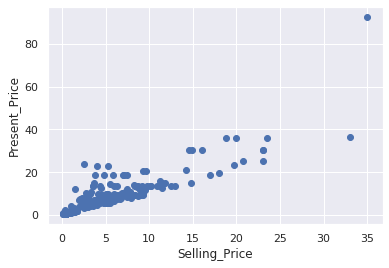

In [87]:
plt.scatter(X, Y)
plt.ylabel('Present_Price')
plt.xlabel('Selling_Price')
plt.show()

In [88]:
X = X[:,np.newaxis] #np.newaxis increase the dimension => 1D to 2D and 2D to 3D and so on
Y = Y[:,np.newaxis] #np.newaxis help to convert to row vector or column vector

In [206]:
theta = np.zeros([2,1])
iterations = 16000
alpha = 0.008
ones = np.ones((m,1))

In [91]:
X = np.hstack((ones, X)) # adding the intercept term
#to make matrix function work

In [194]:
def computeCost(X, y, theta):
    m = len(y)
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

In [191]:
J = computeCost(X,Y,theta)
J

66.33303542857143

In [207]:
def gradientDescent(X, Y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - Y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescent(X, Y, theta, alpha, iterations)
print(theta)

[[0.66054702]
 [1.49484719]]


In [208]:
J = computeCost(X,Y,theta)
J

8.467137970035928

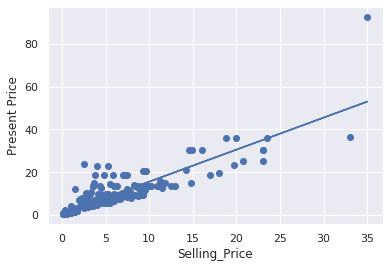

In [209]:
plt.scatter(X[:,1],Y)
plt.xlabel("Selling_Price")
plt.ylabel("Present Price")
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

In [210]:
tmp = np.dot(X,theta)
tmp = tmp[:,0]

lg['Predicted_Price'] = pd.Series(tmp)
lg

,Selling_Price,Present_Price,Predicted_Price
0,3.35,5.59,5.668285
1,4.75,9.54,7.761071
2,7.25,9.85,11.498189
3,2.85,4.15,4.920862
4,4.60,6.87,7.536844
...,...,...,...
296,9.50,11.60,14.861595
297,4.00,5.90,6.639936
298,3.35,11.00,5.668285
299,11.50,12.50,17.851290


In [211]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(lg.iloc[:,1],lg.iloc[:,2] )))

4.1151276942607575


# Scikit Learn


In [109]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [111]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.64045829]
[[0.         1.54318531]]


In [113]:
y_pred = regressor.predict(X_test)

In [116]:
y_pred

array([[13.37173706],
       [ 1.41205094],
       [ 8.74218114],
       [15.3007187 ],
       [28.4177938 ],
       [ 9.12797747],
       [ 6.42740318],
       [ 1.33489167],
       [ 7.58479216],
       [ 7.58479216],
       [ 4.80705861],
       [ 1.75155171],
       [ 8.74218114],
       [12.21434808],
       [12.60014441],
       [31.11836809],
       [12.06002955],
       [ 7.97058849],
       [ 1.18057314],
       [ 3.26387331],
       [ 7.43047363],
       [ 8.74218114],
       [ 8.5261352 ],
       [18.00129298],
       [ 0.94909535],
       [ 1.84414282],
       [ 1.2268687 ],
       [ 1.64352873],
       [ 1.41205094],
       [ 6.19592539],
       [ 5.65581053],
       [11.75139249],
       [ 1.56636947],
       [14.14332972],
       [ 5.2700142 ],
       [ 2.41512139],
       [10.82548131],
       [ 7.97058849],
       [ 1.02625461],
       [13.37173706],
       [14.91492237],
       [31.48873256],
       [ 9.12797747],
       [ 7.97058849],
       [ 9.12797747],
       [20

In [117]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,9.400,13.371737
1,0.826,1.412051
2,5.700,8.742181
3,11.600,15.300719
4,19.770,28.417794
...,...,...
56,0.787,1.643529
57,4.430,4.575581
58,5.870,7.044677
59,3.450,2.723758


In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.1378784929493917
Mean Squared Error: 9.558997335543676
Root Mean Squared Error: 3.091762820066196
